Overview:

I chose the "Melbourne Housing" data set. The data set contains a variety of fields.  For my analysis, I chose the: "Rooms", "Price", "Distance", "Bedroom", "Bathroom", "Car", "Landsize" and "BuildingArea" features. The goal of this analysis is to perform an analysis using the Support Vector Machine (SVM) algorithm and comparing it with the results of the previous assignment (the one where I was asked to build two Decision trees and one Random Forest). I will create three tables which will each display a comparison of the Score (Accuracy) and RMSE of First Decsion Tree (from Homework # 2) vs SVM, Second Decison Tree (from Homework #2) vs SVM and Random Forest Tree (from Homework # 2). It is also important to note that because I used the decsion trees and random forest algorithm for Regression in Homework #2, I will also utilize SVM for Regression for this assignment as well. 


 The data is the same for both assignments.
Below are the feature definitions of the "Melbourne Housing" data set:

1). Rooms: Number of Rooms in a house </br>
2). Price: The price of a house</br>
3). Distance: The distance from the Central Business District in Kilometers</br>
4). Bedroom: The number of bedrooms in a house</br>
5). Bathroom: The number of bathrooms in a house</br>
6). Car: The number of car spots in a house</br>
7). Landsize: The size of the land where the house stands on in square meters</br>
8). Building Area: The total area of the house calculated on a floor by floor basis in square meters</br>

The Melbourne data set has been taken from Kaggle: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot


1). Exploratory Data Analysis:



              Suburb           Address  Rooms Type    Price Method   SellerG  \
0         Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

             Date  Distance  Postcode  

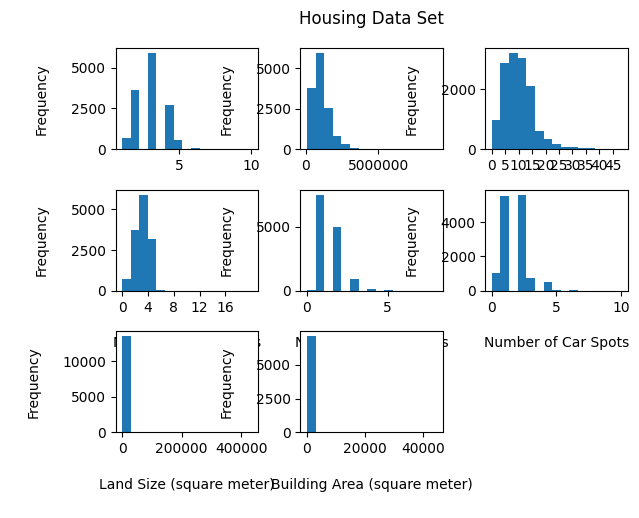

C:\Users\Staff\AppData\Local\Temp\ipykernel_21172\834964819.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(np.arange(0, 20, 2))
C:\Users\Staff\AppData\Local\Temp\ipykernel_21172\834964819.py:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(np.arange(0, 900, 100))


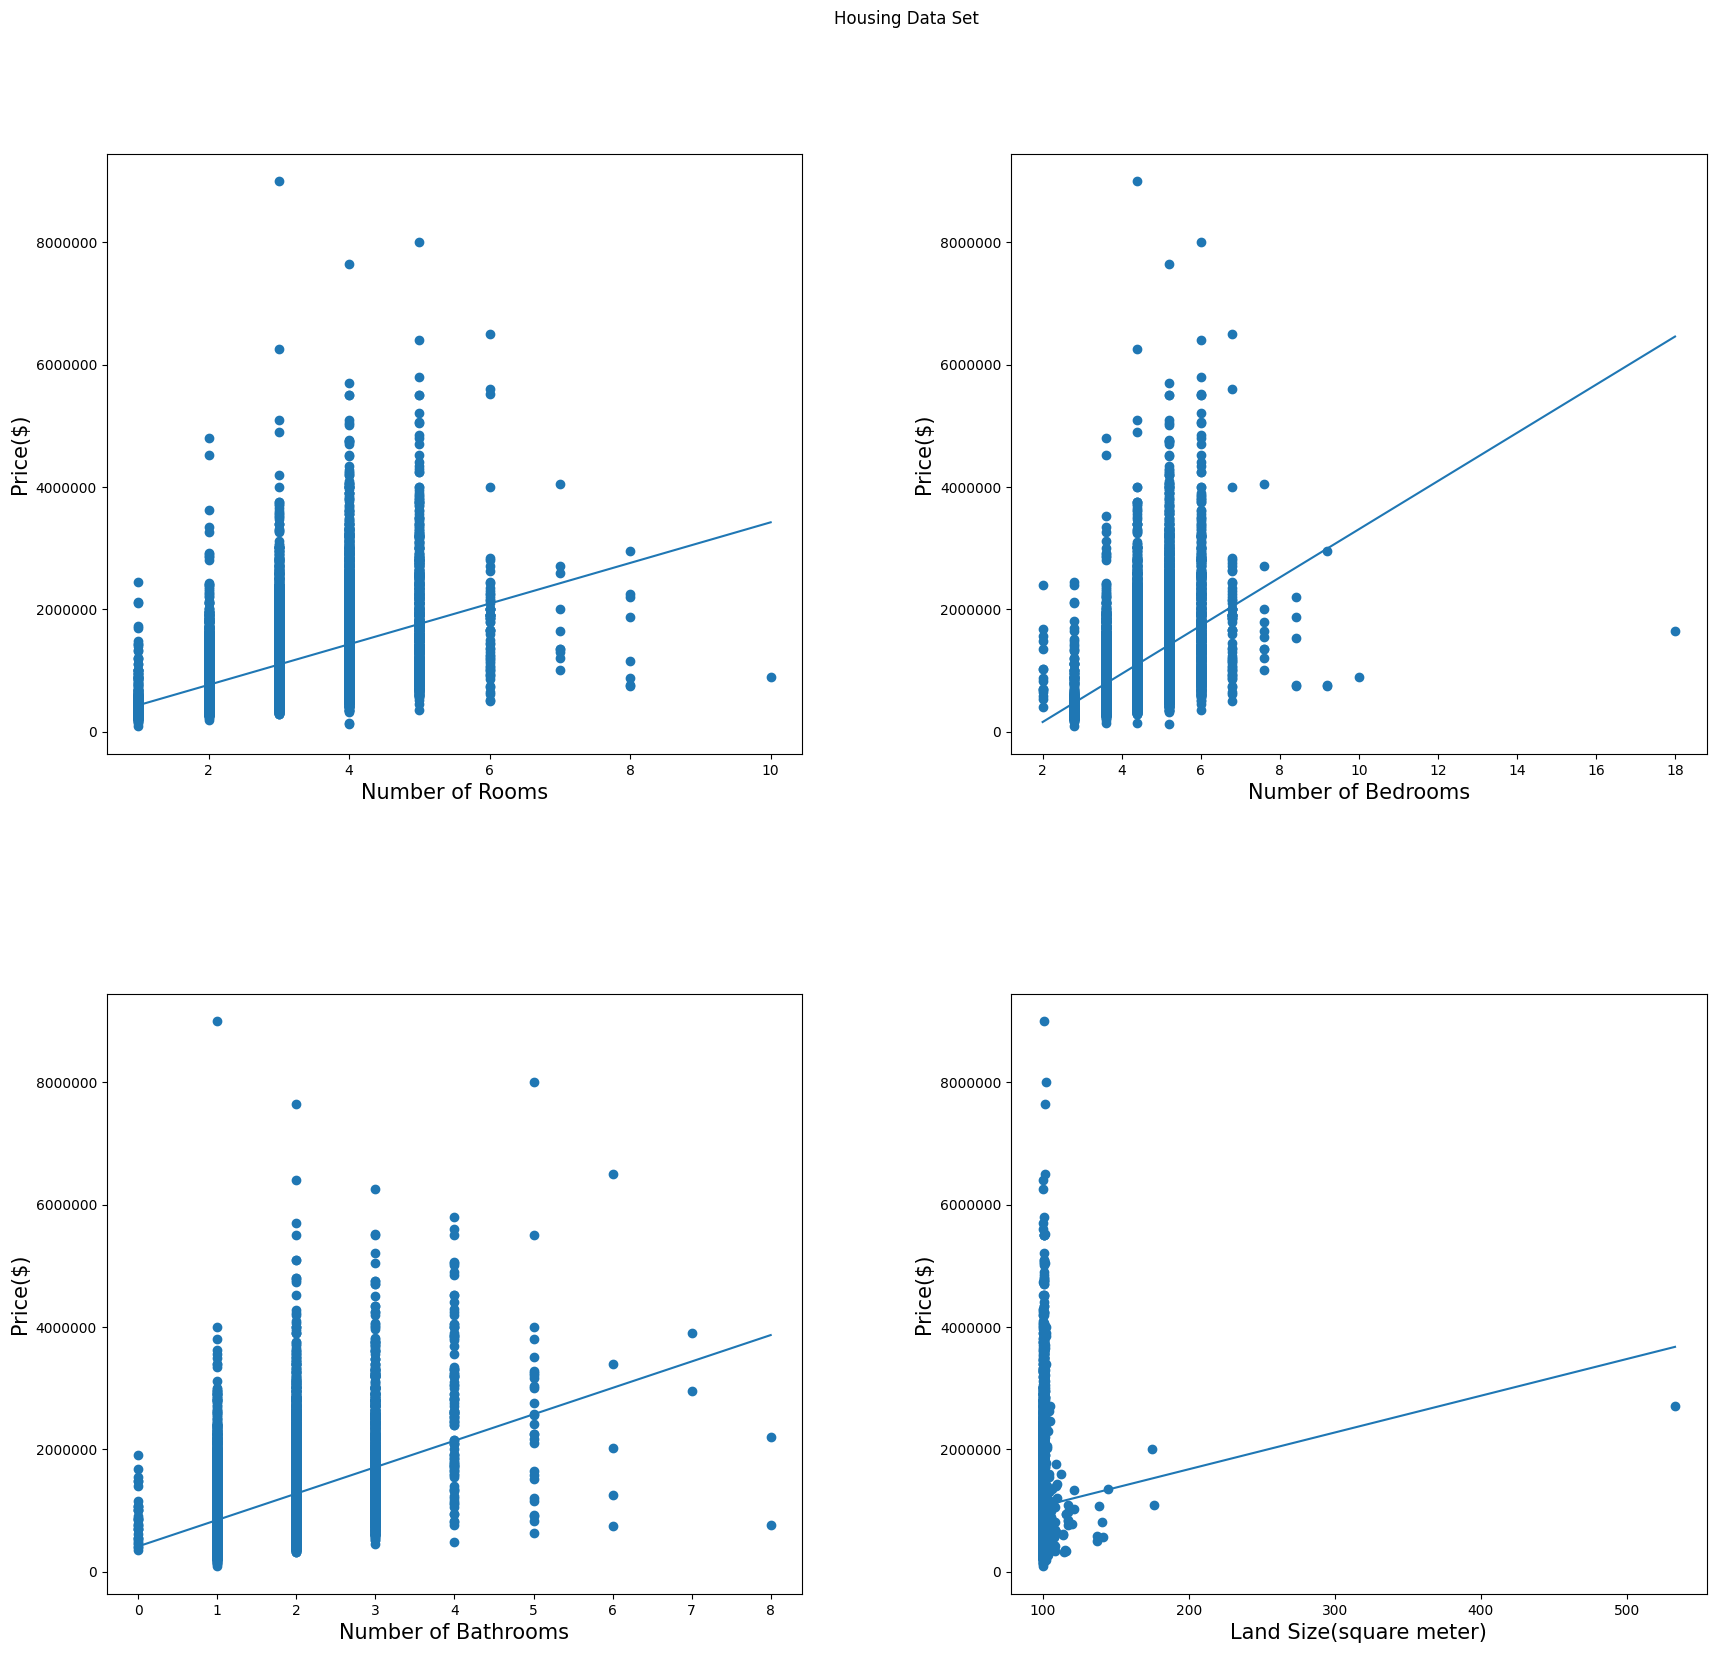

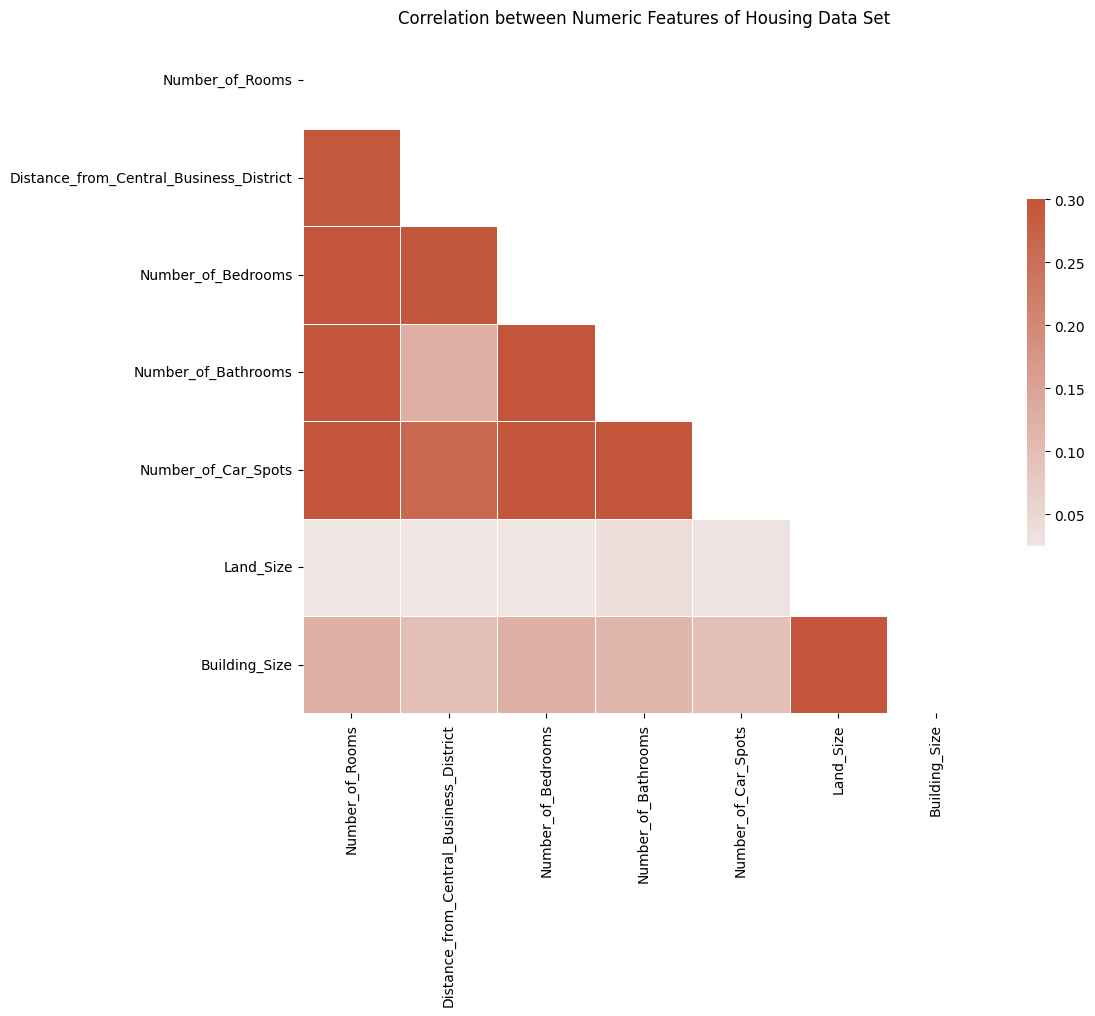

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from numpy import nan
from numpy import isnan
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from tabulate import tabulate


#Load the "housing data" data set from GitHub
housing_data = pd.read_csv("https://raw.githubusercontent.com/Data-Vlad/Data-Science/main/Data%20622%20-%20Machine%20Learning%20and%20Big%20Data/Project%20%23%203/melb_data.csv")

#Print the first 10 records of each data set
print(housing_data)

#Drop columns which are not needed for our analysis
housing_data.drop(['Suburb','Address','Type','Method','SellerG','Date', 'Postcode','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'],axis=1,inplace=True)

#Rename columns for clarity
housing_data.rename(columns = {'Rooms':'Number_of_Rooms', 'Distance':'Distance_from_Central_Business_District', 'Bedroom':'Number_of_Bedrooms','Bathroom': 'Number_of_Bathrooms','Car':'Number_of_Car_Spots', 'Landsize':'Land_Size','BuildingArea':'Building_Size'}, inplace = True) 

#identify the columns with missing values
null_series =housing_data.isnull().sum()
print('No of columns with null values\n', null_series[null_series > 0].sort_values(ascending=False))

#print the shape of the data
print("Housing Data Shape: ",housing_data.shape)

#print the summary statistics for the data set
print(housing_data.describe())

#I will now create a grid of histograms to measure the distribution for the numeric values within the data set
#Number of Rooms
plt.subplot(3,3,1)
plt.hist(housing_data['Number_of_Rooms'], bins = 15)
plt.xlabel('\nNumber of Rooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Price of House
plt.subplot(3,3,2)
plt.hist(housing_data['Price'], bins = 15)
plt.xlabel('\nPrice($)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.ticklabel_format(scilimits=(-5, 8),axis='x')
#Distance of House
plt.subplot(3,3,3)
plt.hist(housing_data['Distance_from_Central_Business_District'], bins = 15)
plt.xlabel('\nDistance(km)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.xticks(np.arange(0, 50, 5))
#Number of Bedrooms
plt.subplot(3,3,4)
plt.hist(housing_data['Number_of_Bedrooms'], bins = 15)
plt.xlabel('\nNumber of Bedrooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.xticks(np.arange(0, 20, 4))
#Number of Bathrooms
plt.subplot(3,3,5)
plt.hist(housing_data['Number_of_Bathrooms'], bins = 15)
plt.xlabel('\nNumber of Bathrooms\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Number of Car Spots
plt.subplot(3,3,6)
plt.hist(housing_data['Number_of_Car_Spots'], bins = 15)
plt.xlabel('\nNumber of Car Spots\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Land Size
plt.subplot(3,3,7)
plt.hist(housing_data['Land_Size'], bins = 15)
plt.xlabel('\nLand Size (square meter)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
#Building Area
plt.subplot(3,3,8)
plt.hist(housing_data['Building_Size'], bins = 15)
plt.xlabel('\nBuilding Area (square meter)\n', fontsize = 10)
plt.ylabel('\nFrequency\n', fontsize = 10)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,  top=0.9,   wspace=0.3,  hspace=0.4)
plt.suptitle('Housing Data Set')
plt.show()


#I will now create a grid of scatter plots to check if any relationship exists between the predictor variables against price of house
fig, ax = plt.subplots(2,2, figsize=(20,18))
#Number of Rooms
ax[0,0].scatter(housing_data['Number_of_Rooms'],housing_data['Price'] , color='tab:blue')
ax[0,0].plot(np.unique(housing_data['Number_of_Rooms']), np.poly1d(np.polyfit(housing_data['Number_of_Rooms'], housing_data['Price'], 1))(np.unique(housing_data['Number_of_Rooms'])))
ax[0,0].set_xlabel('Number of Rooms', fontsize=15)
ax[0,0].set_ylabel('Price($)', fontsize=15)
ax[0,0].ticklabel_format(scilimits=(-5, 7),axis='y')
#Number of Bedrooms
ax[0,1].scatter(housing_data['Number_of_Bedrooms'],housing_data['Price'] , color='tab:blue')
ax[0,1].plot(np.unique(housing_data['Number_of_Bedrooms']), np.poly1d(np.polyfit(housing_data['Number_of_Bedrooms'], housing_data['Price'], 1))(np.unique(housing_data['Number_of_Bedrooms'])))
ax[0,1].set_xlabel('Number of Bedrooms', fontsize=15)
ax[0,1].set_ylabel('Price($)', fontsize=15)
ax[0,1].ticklabel_format(scilimits=(-5, 7),axis='y')
ax[0,1].set_xticklabels(np.arange(0, 20, 2))
#Number of Bathrooms
ax[1,0].scatter(housing_data['Number_of_Bathrooms'],housing_data['Price'] , color='tab:blue')
ax[1,0].plot(np.unique(housing_data['Number_of_Bathrooms']), np.poly1d(np.polyfit(housing_data['Number_of_Bathrooms'], housing_data['Price'], 1))(np.unique(housing_data['Number_of_Bathrooms'])))
ax[1,0].set_xlabel('Number of Bathrooms', fontsize=15)
ax[1,0].set_ylabel('Price($)', fontsize=15)
ax[1,0].ticklabel_format(scilimits=(-5, 7),axis='y')
#Land Size
ax[1,1].scatter(housing_data['Land_Size'],housing_data['Price'] , color='tab:blue')
ax[1,1].plot(np.unique(housing_data['Land_Size']), np.poly1d(np.polyfit(housing_data['Land_Size'], housing_data['Price'], 1))(np.unique(housing_data['Land_Size'])))
ax[1,1].set_xlabel('Land Size(square meter)', fontsize=15)
ax[1,1].set_ylabel('Price($)', fontsize=15)
ax[1,1].ticklabel_format(scilimits=(-5, 7),axis='y')
ax[1,1].set_xticklabels(np.arange(0, 900, 100))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,  top=0.9,   wspace=0.3,  hspace=0.4)
plt.suptitle('Housing Data Set')
plt.show()


# I will now create a correlation matrix to measure the degree of relationship between the predictor variables
numeric_correlation = housing_data[['Number_of_Rooms', 'Distance_from_Central_Business_District','Number_of_Bedrooms', 'Number_of_Bathrooms', 'Number_of_Car_Spots', 'Land_Size','Building_Size']]
d = pd.DataFrame(data=numeric_correlation , columns=list(numeric_correlation .columns))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sea.diverging_palette(230, 20, as_cmap=True)
sea.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between Numeric Features of Housing Data Set')
plt.show()

# Remove rows with missing values
housing_data.dropna(inplace=True)



2). Model Building and Evaluation:

In [2]:

#FIRST DECSION TREE REGRESSION MODEL FROM PREVIOUS ASSIGNMENT VS SVM MODEL

#FIRST DECSION TREE REGRESSION MODEL FROM PREVIOUS ASSIGNMENT: 
x=['Number_of_Rooms','Number_of_Car_Spots','Land_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model 
dt1_model = DecisionTreeRegressor(random_state=0, max_depth=3)
dt1_model =dt1_model.fit(X_train,y_train)
#Score
dt1_SCORE=dt1_model.score(x_test,y_test)
#Predicting the model
dt1_pred = dt1_model.predict(x_test)
#MAE
dt1_MAE = float(format(MAE(y_test, dt1_pred ), '.3f'))
#RMSE
dt1_RMSE = float(format(np.sqrt(MSE(y_test, dt1_pred )), '.3f'))

#SVM REGRESSION MODEL:
x=['Number_of_Rooms','Number_of_Car_Spots','Land_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],random_state = 0)
svm1_model = SVR(C = 100, gamma = 1, kernel = 'linear')
#train the model 
svm1_model = svm1_model.fit(X_train, y_train)
#predicting the SVR model
svm1_pred = svm1_model.predict(x_test)
#Score
svm1_SCORE=  r2_score(y_test, svm1_pred )
#MAE
svm1_MAE = float(format(MAE(y_test, svm1_pred ), '.3f'))
#RMSE
svm1_RMSE = float(format(np.sqrt(MSE(y_test, svm1_pred)), '.3f'))
# Table comparing accuracy of First Decsion Tree Regression model vs SVM Model
table = [['Model','SCORE', 'MAE','RMSE'], ['First Decsion Tree Regression', dt1_SCORE,dt1_MAE ,dt1_RMSE ], ['SVM Regression', svm1_SCORE,svm1_MAE, svm1_RMSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))




#SECOND DECSION TREE REGRESSION MODEL FROM PREVIOUS ASSIGNMENT VS SVM MODEL

#SECOND DECSION TREE REGRESSION MODEL FROM PREVIOUS ASSIGNMENT: 
x=['Distance_from_Central_Business_District','Number_of_Bedrooms','Building_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model 
dt2_model = DecisionTreeRegressor(random_state=0, max_depth=3)
dt2_model =dt2_model.fit(X_train,y_train)
#Score
dt2_SCORE=dt2_model.score(x_test,y_test)
#predicting the model
dt2_pred = dt2_model.predict(x_test)
#MAE
dt2_MAE = float(format(MAE(y_test, dt2_pred ), '.3f'))
#RMSE
dt2_RMSE = float(format(np.sqrt(MSE(y_test, dt2_pred )), '.3f'))

#SVM REGRESSION MODEL:
x=['Distance_from_Central_Business_District','Number_of_Bedrooms','Building_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],random_state = 0)
svm2_model = SVR(C = 100, gamma = 1, kernel = 'linear')
#train the model 
svm2_model = svm2_model.fit(X_train, y_train)
#predicting the SVR model
svm2_pred = svm2_model.predict(x_test)
#Score
svm2_SCORE=  r2_score(y_test, svm2_pred )
#MAE
svm2_MAE = float(format(MAE(y_test, svm2_pred ), '.3f'))
#RMSE
svm2_RMSE = float(format(np.sqrt(MSE(y_test, svm2_pred)), '.3f'))
# Table comparing accuracy of First Decsion Tree Regression model vs SVM Model
table = [['Model','SCORE','MAE', 'RMSE'], ['Second Decsion Tree Regression', dt2_SCORE,dt2_MAE, dt2_RMSE ], ['SVM Regression', svm2_SCORE,svm2_MAE,svm2_RMSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



#RANDOM FOREST REGRESSION MODEL FROM PREVIOUS ASSIGNMENT VS SVM MODEL


#RANDOM FOREST REGRESSION MODEL
x=['Number_of_Rooms','Distance_from_Central_Business_District','Number_of_Bedrooms','Number_of_Bedrooms','Number_of_Car_Spots','Land_Size','Building_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],  random_state=0)
#train the model
rf_model =  RandomForestRegressor(max_depth=3,random_state=0)
rf_model =rf_model.fit(X_train,y_train)
#Score
rf_SCORE=rf_model.score(x_test,y_test)
#predicting the model
rf_pred = rf_model.predict(x_test)
#MAE
rf_MAE = float(format(MAE(y_test, rf_pred ), '.3f'))
#RMSE
rf_RMSE = float(format(np.sqrt(MSE(y_test, rf_pred )), '.3f'))

#SVM REGRESSION MODEL:
x=['Number_of_Rooms','Distance_from_Central_Business_District','Number_of_Bedrooms','Number_of_Bedrooms','Number_of_Car_Spots','Land_Size','Building_Size']
 # Splitting the dataset into train and test
X_train, x_test, y_train, y_test = train_test_split(housing_data[x], housing_data['Price'],random_state = 0)
svm3_model = SVR(C = 100, gamma = 1, kernel = 'linear')
#train the model 
svm3_model = svm3_model.fit(X_train, y_train)
#predicting the SVR model
svm3_pred = svm3_model.predict(x_test)
#Score
svm3_SCORE=  r2_score(y_test, svm3_pred )
#MAE
svm3_MAE = float(format(MAE(y_test, svm3_pred ), '.3f'))
#RMSE
svm3_RMSE = float(format(np.sqrt(MSE(y_test, svm3_pred)), '.3f'))
# Table comparing accuracy of First Decsion Tree Regression model vs SVM Model
table = [['Model','SCORE','MAE', 'RMSE'], ['Random Forest Regression', rf_SCORE,rf_MAE,rf_RMSE ], ['SVM Regression', svm3_SCORE,svm3_MAE, svm3_RMSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))



╒═══════════════════════════════╤══════════╤════════╤════════╕
│ Model                         │    SCORE │    MAE │   RMSE │
╞═══════════════════════════════╪══════════╪════════╪════════╡
│ First Decsion Tree Regression │ 0.305032 │ 386857 │ 559188 │
├───────────────────────────────┼──────────┼────────┼────────┤
│ SVM Regression                │ 0.123454 │ 395828 │ 628004 │
╘═══════════════════════════════╧══════════╧════════╧════════╛
╒════════════════════════════════╤══════════╤════════╤════════╕
│ Model                          │    SCORE │    MAE │   RMSE │
╞════════════════════════════════╪══════════╪════════╪════════╡
│ Second Decsion Tree Regression │ 0.397679 │ 344349 │ 520582 │
├────────────────────────────────┼──────────┼────────┼────────┤
│ SVM Regression                 │ 0.244261 │ 341165 │ 583124 │
╘════════════════════════════════╧══════════╧════════╧════════╛
╒══════════════════════════╤══════════╤════════╤════════╕
│ Model                    │    SCORE │    MAE │   RM

**Discuss articles provided (1A & B) comparing the use of decsion trees vs SVMs in your current area of interest**

I do have interest in understanding how machine learning algorithms can help us better understand and predict any medical issues. I believe it is one (if not the most) important implementations/use cases of machine learning algorithms. Better utilization of these can potentially save lives. 

*Article 1A):*

This particular article focuses on how various machine learning algorithms predict Covid-19 cases using routine labratory findings. 
Five algorithms were tested. In this contextg, we are concerned with the performance of SVM and Random forests when it comes to prediction. Interestingly enough, Random Forests performed best for predicting hospital admissions for Covid-19, where as SVM performed best for predicting ICU admission for Covid-19 positive patients. I believe that part of the reason for these results is that Random Forests perform better/faster when there are more data points. It is clear that there are much more data points of hospital admissions than ICU admissions for Covid-19.

*Article 1B):*

This article discusses a variety of studies where SVM based learning models can diagnose diseases like diabetes and heart disease. A system which is used to diagnose early heart failure feature utilizes two models ---- one for feature engineering and one for prediction. Employing the system in such a way improves accuracy by about 30%. It is really amazing to see how the utilization of ML models can aid in saving human lives by helping doctors with early detection. It most ever so much more importance on trying to train and retrain the models in order to find the most accurate model.

**Three research articles comparing the use of decsion trees vs SVMs in your current area of expertise:**

My current area of expertise is in the higher education domain. I work at the Data Management and Analysis Office at Brooklyn College. We work with both student and employee data.

*Article 1:* https://digibuo.uniovi.es/dspace/bitstream/handle/10651/54664/Decision_making.pdf?sequence=1

This article discusses on how ML decsion-making models can support the strategic decisions made by Higher Education Institutions. ML models would be useful in increasing student retention, creating strategies for to reduce student failure and decrease the dropout rate. The article compared various ML learning algorithms but we will focus on the comparison of SVM, Decsion Tree and Random Forest. According to the results, in most cases, SVM had the highest accuracy, followed by the Random Forest algorithm , followed by Descion Trees, having the least accuracy of the three algorithms. The article states that the reason the SVM model attained highe performance is because it was able to efficiently classify non-linear data when utilizing the neccessary kernel function.

*Article 2:* https://link.springer.com/article/10.1186/s40561-022-00192-z

This article discussed educational data mining which is a useful tool for exploring hidden relationships in educational data as well as predicting student grades. The study in this article looks to create a model to predict the final exam grades of undergraduate students, utilizing their midterm grades as a predictor variable. A variety of ML learning algorithms are utilized in the study, however, we will focus on Decsion Trees, Random Forests and SVMs. According to the article, all three algorithms, Random Forest, Decsion Trees and SVMs were able to predict student final grades based on midterm grades with an accuracy of 65% to a 100%. However, another study an article discusses is comparing the algorithms from highest to lowest accuracy. The results showed that the SVM algorithm had the highest performance and the decison tree had the lowest performance. To me this indicates that SVMs have better accuracy than decsion trees when it comes to classification.


*Article 3:* https://ieeexplore.ieee.org/abstract/document/10156839

This article conducted a variety of studies pertaining to student performance. I would like to focus on the one which compares the performance of the SVM and Decsion Tree algorithms. The study was conducted around a e-learning simulation software called: "DEEDS". It was used to construct a dataset to track students' interactions during a lab class. The DEEDS study considered five features when constructing a model for the purposes of classification. These features included: "average idle time", "average time", the "total number of activities", "total related activity" and the "average number of keystrokes". The best performing models when it comes to comparing the SVM and Decsion Tree algorithms was SVM. It acheived 94% accuracy. Once again it looks like when it comes to classification, SVM is the way to go.


**Answer question such as:**

*1). Which algorithm is recommended to get more accurate results?*

 If you are dealing with relatively simple data sets,with a small number of features, choosing the Decsion Tree algorithm might be the way to go. When having a small data set not a lot of generalization or computational power is needed and results would be very interpertable. However, as in most cases, if you are dealing with complex data sets which require generaization, SVMs are the way to go. They work great with complex data and are worth the computational power to run them. Since, more times than not we deal with high-dimensional data SVMs should be utilized and will produce the more accurate results. 

 *2). Is it better for classification or regression scenarios?*

 SVMs are commonly used for classification problems. The purpose of the algorithm is to distinguish between two classes by finding the optimal hyperplane that maximizes the difference between opposing classes. Even though SVR, in many cases is still useful in predicting numerical values.

 *3). Do you agree with the recommendations? Why?*

 I do agree that in terms of most metrics SVMs tend to have better accuracy than Decsion trees. They are more robust and less susceptible to noise. SVMs are better at generalizing data as well as highly efficient at handeling highly dimensional data. However, as mentioned earlier, it is not one size fits all. Everything depends on the data set. If the data set is relatively small/simple, decsion trees are the way to go because they are faster, more interpertable and are simpler to understand. However,as in the majority of cases, if you are faced with a highly-dimensional, complex data set(s) SVMs will give much better results and are easier to understand.

 
 
 **Essay/Summary:**

* First Decsion Tree (from Homework # 2) vs SVM (SVR)*

I recreated the First Decision Tree from Homework #2 and compared the Score (Accuracy), MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) to an SVM ---- SVR in my case because my analysis involved the regression scenario. The first metric I evaluated on is Score. The Decsion Tree had an accuracy of 30% and the SVR model had an accuracy of 12%. In terms of Mean Absolute Error, the decsion tree (386857) had less than the SVM (395828) further supporting the fact that the decsion tree was more accurate than the SVM. Going along the same line as the other metrics the SVM (628004) had a higher RMSE than the decsion tree (559188) ---- again showing that decsion tree was more accurate. I believe this was the case because, there was a small number of features and two of the three features were colinear ('Number_of_Rooms' and 'Number_of_carspots') ---- and decsion trees work best with smaller number of features and colinearity than SVMs do.
 
 
 * Second Decsion Tree (from Homework # 2) vs SVM (SVR)*

 I recreated the Second Decision Tree from Homework #2 and compared the Score (Accuracy), MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) to an SVM ---- SVR in my case because my analysis involved the regression scenario. The first metric I evaluated on is Score. The Decision Tree had an accuracy of 39% and the SVR model had an accuracy of 24%.  In terms of Mean Absolute Error, the decsion tree (344349) had more than the SVM (341165). As far as RMSE, the decsion tree (520582) had a lower RMSE than the SVM (583124). The question which arises is: why did the SVM had a lower MAE but higher RMSE than the decsion tree? The answer to this is that the RMSE penalizes large gaps among small output values much more than the MAE metric. This would indicated that the SVM model had more of those gaps and this would bring decsion tree accuracy down as far as the MAE metric. Finally, we can conclude that, overall, the decsion tree had greater accuracy than the SVM. I believe this to be true because once again we are not dealing with a lot of features and the data set is relatively simple with a variety of colinear features. Simple enough scenario for decsion trees to outperform SVM. 
 
 
  * Random Forest (from Homework # 3) vs SVM (SVR)*
 
  I recreated the Random Forest from Homework #2 and compared the Score (Accuracy), MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) to an SVM ---- SVR in my case because my analysis involved the regression scenario. The first metric I evaluated on is Score. The Random Forest had an accuracy of 45% and the SVR model had an accuracy of 33%. In terms of Mean Absolute Error, the Random Forest(323144) had less than the SVM (332485) further supporting the fact that the random forest was more accurate than the SVM. Going along the same line as the other metrics the SVM (547152) had a higher RMSE than the random forest (495348) ---- again showing that random forest was more accurate. In my opinion, the random forests produced more accurate results because it was less overfitted than the SVM due to the fact that several decsion trees were combined to produce more accurate results.



   **Conclusion:**

   In conclusion, I believe that one shoe does not fit all. One must choose the ML model based on need and situation which it is most suitable for. If you are working with a relatively small data set which does not have many features you are best off using a decsion tree. If your data set is very large and contains many features, i.e. needs to be better generalized, the SVM is the way to go. It also depends on the goals of the task. If you are classifying or predicting a few features ---- less complex, decsion trees would have better interperbility. However, if we are classifying or prediction a lot of features, we might want to use SVM. In reality,  there are many more things to be taken into consideration depending on the problem at hand.